In [70]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from itertools import product
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

ModuleNotFoundError: No module named 'tensorflow'

In [44]:
n = 100
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xv, yv = np.meshgrid(x, y)
inputs = torch.unsqueeze(torch.FloatTensor(list(product(x, y))), dim=1)

# (out_features, in_features)
w1 = torch.randn(8, 2, dtype=torch.float32)
w2 = torch.randn(8, 8, dtype=torch.float32)
w3 = torch.randn(1, 8, dtype=torch.float32)


In [45]:
inputs.size()

torch.Size([10000, 1, 2])

In [46]:
class NLN(nn.Module):
    def __init__(self, w1, w2, w3):
        super().__init__()
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        self.relu = nn.ReLU()
    
    def forward(self, x):
        h1 = self.relu(F.linear(x, self.w1))
        h2 = self.relu(F.linear(h1, self.w2))
        output = self.relu(F.linear(h2, self.w3))
        return output

In [68]:
class NLLN(nn.Module):
    def __init__(self, w1, w2, w3, scale=2**125):
        super().__init__()
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        self.scale = scale
    
    def forward(self, x):
        h1 = (F.linear(x, self.w1) / self.scale)
        h2 = (F.linear(h1, self.w2) / self.scale)
        output = ((F.linear(h2, self.w3)) / self.scale) * self.scale
        return output

In [69]:
nln = NLN(w1, w2, w3)
nlln = NLLN(w1, w2, w3)

42535295865117307932921825928971026432


In [67]:
nln_outputs = nln(inputs)
nlln_outputs = nlln(inputs)

torch.FloatTensor


RuntimeError: Overflow when unpacking long

In [28]:
tups = list(zip(inputs, nln_outputs))

In [29]:
nln_grid = np.array(nln_outputs.view(1, 100, 100).squeeze(0))
nlln_grid = np.array(nlln_outputs.view(1, 100, 100).squeeze(0))

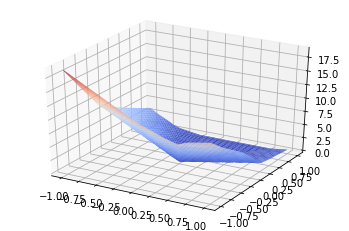

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=xv, Y=yv, Z=nln_grid, cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

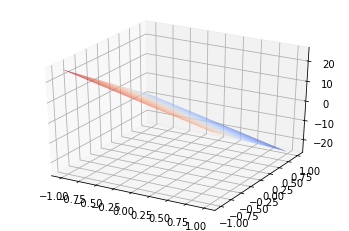

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=xv, Y=yv, Z=nlln_grid, cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()